code hasil terstrukturnya dan hasilnya sama dgn yg percobaan 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [46]:
#menampilkan 5 baris pertama dari data yg telah di proses
#menampilkan informasi dataset (jumlah baris kolom, tipe data dll)

def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    labelencoder_Y = LabelEncoder()
    data['diagnosis'] = labelencoder_Y.fit_transform(data['diagnosis'].values)
    print("Data setelah preprocessing:")
    print(data.head())
    print("\nInformasi dataset:")
    print(data.info())
    return data

In [47]:
#menampilkan 5 baris pertama dari data yg telah di normalisasi
#menampilkan statistik deskriptif (mean, std, min, max dll)

def normalize_data(data):
    scaler = StandardScaler()
    features = data.drop('diagnosis', axis=1)
    data_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
    data_scaled['diagnosis'] = data['diagnosis']
    print("\nData setelah normalisasi:")
    print(data_scaled.head())
    print("\nStatistik deskriptif data yang dinormalisasi:")
    print(data_scaled.describe())
    return data_scaled

In [48]:
#menampilkan daftar 10 fitur teratas beserta  peringkatnya

def select_important_features(data, k=10):
    selector = SelectKBest(f_classif, k=k)
    selector.fit(data.drop('diagnosis', axis=1), data['diagnosis'])
    top_features = data.drop('diagnosis', axis=1).columns[selector.get_support()].tolist()
    print(f"\nTop {k} fitur paling penting:")
    for i, feature in enumerate(top_features, 1):
        print(f"{i}. {feature}")
    return top_features

In [49]:
#menambahkan pesan print untuk memberitahu bahwa visualisasi sedang dibuat

def visualize_data(data, top_features):
    # Pairplot
    print("\nMembuat pairplot...")
    sns.pairplot(data, hue='diagnosis', vars=top_features[:4], corner=True)
    plt.suptitle("Pairplot Fitur Penting", y=1.02)
    plt.show()
    
    # Heatmap
    print("\nMembuat heatmap...")
    correlation_matrix_important = data[top_features + ['diagnosis']].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix_important, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Peta Panas Korelasi Fitur Penting")
    plt.show()

    # Histogram
    print("\nMembuat histogram...")
    plt.figure(figsize=(15, 10))
    data[top_features].hist(figsize=(20, 20), bins=50)
    plt.tight_layout()
    plt.suptitle("Distribusi 10 Fitur Teratas", y=1.02)
    plt.show()

In [50]:
def perform_statistical_tests(data, top_features):
    print("\nHasil uji t-test untuk fitur-fitur penting:")
    for column in top_features:
        benign = data[data['diagnosis'] == 0][column]
        malignant = data[data['diagnosis'] == 1][column]
        t_stat, p_val = stats.ttest_ind(benign, malignant)
        print(f"{column}: t-statistic = {t_stat:.4f}, p-value = {p_val:.4e}")

Data setelah preprocessing:
         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  textur

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

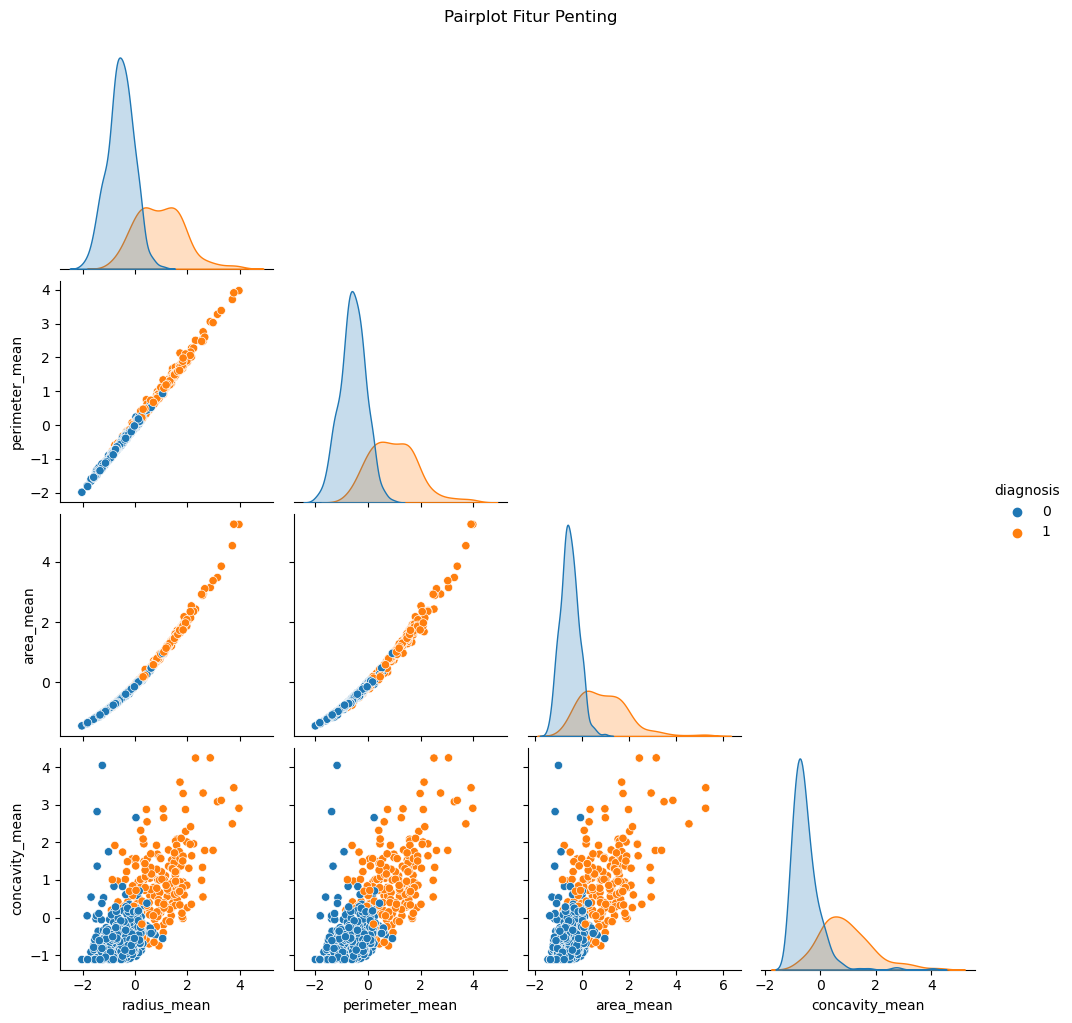


Membuat heatmap...


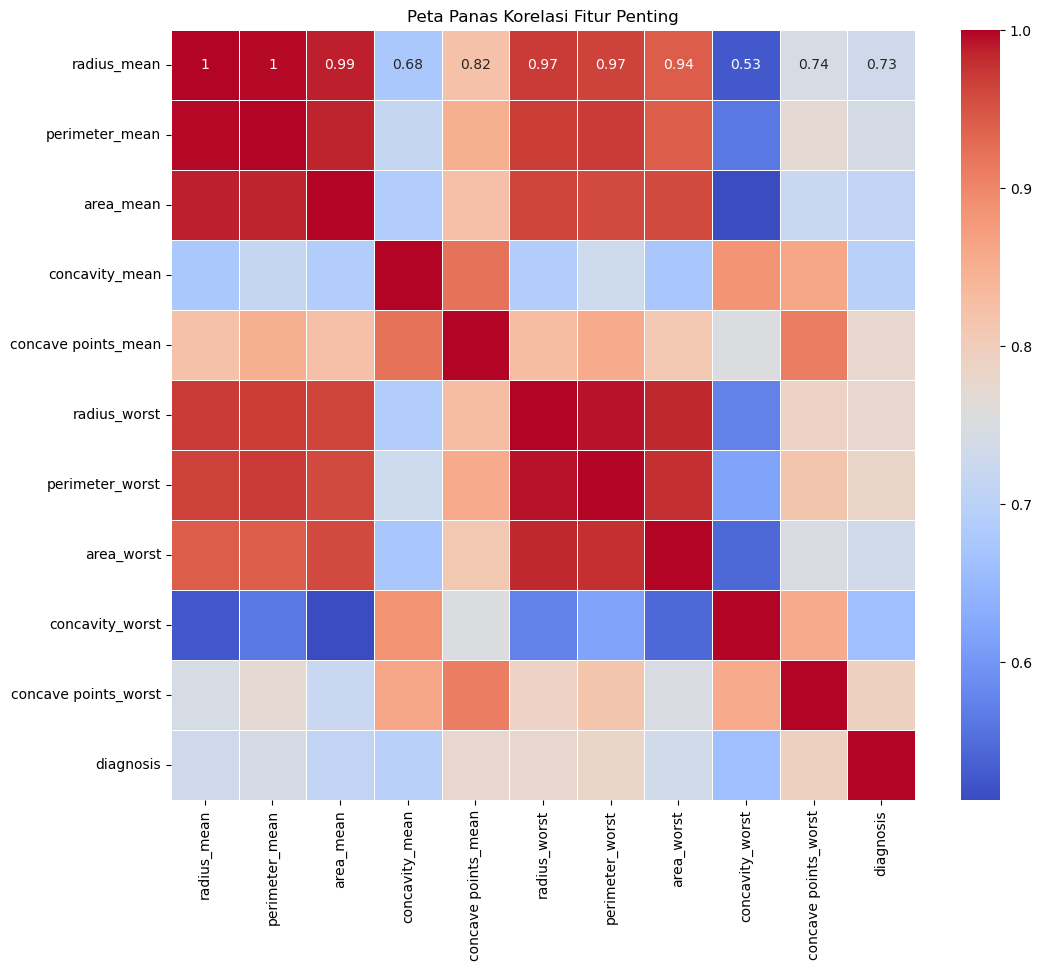


Membuat histogram...


<Figure size 1500x1000 with 0 Axes>

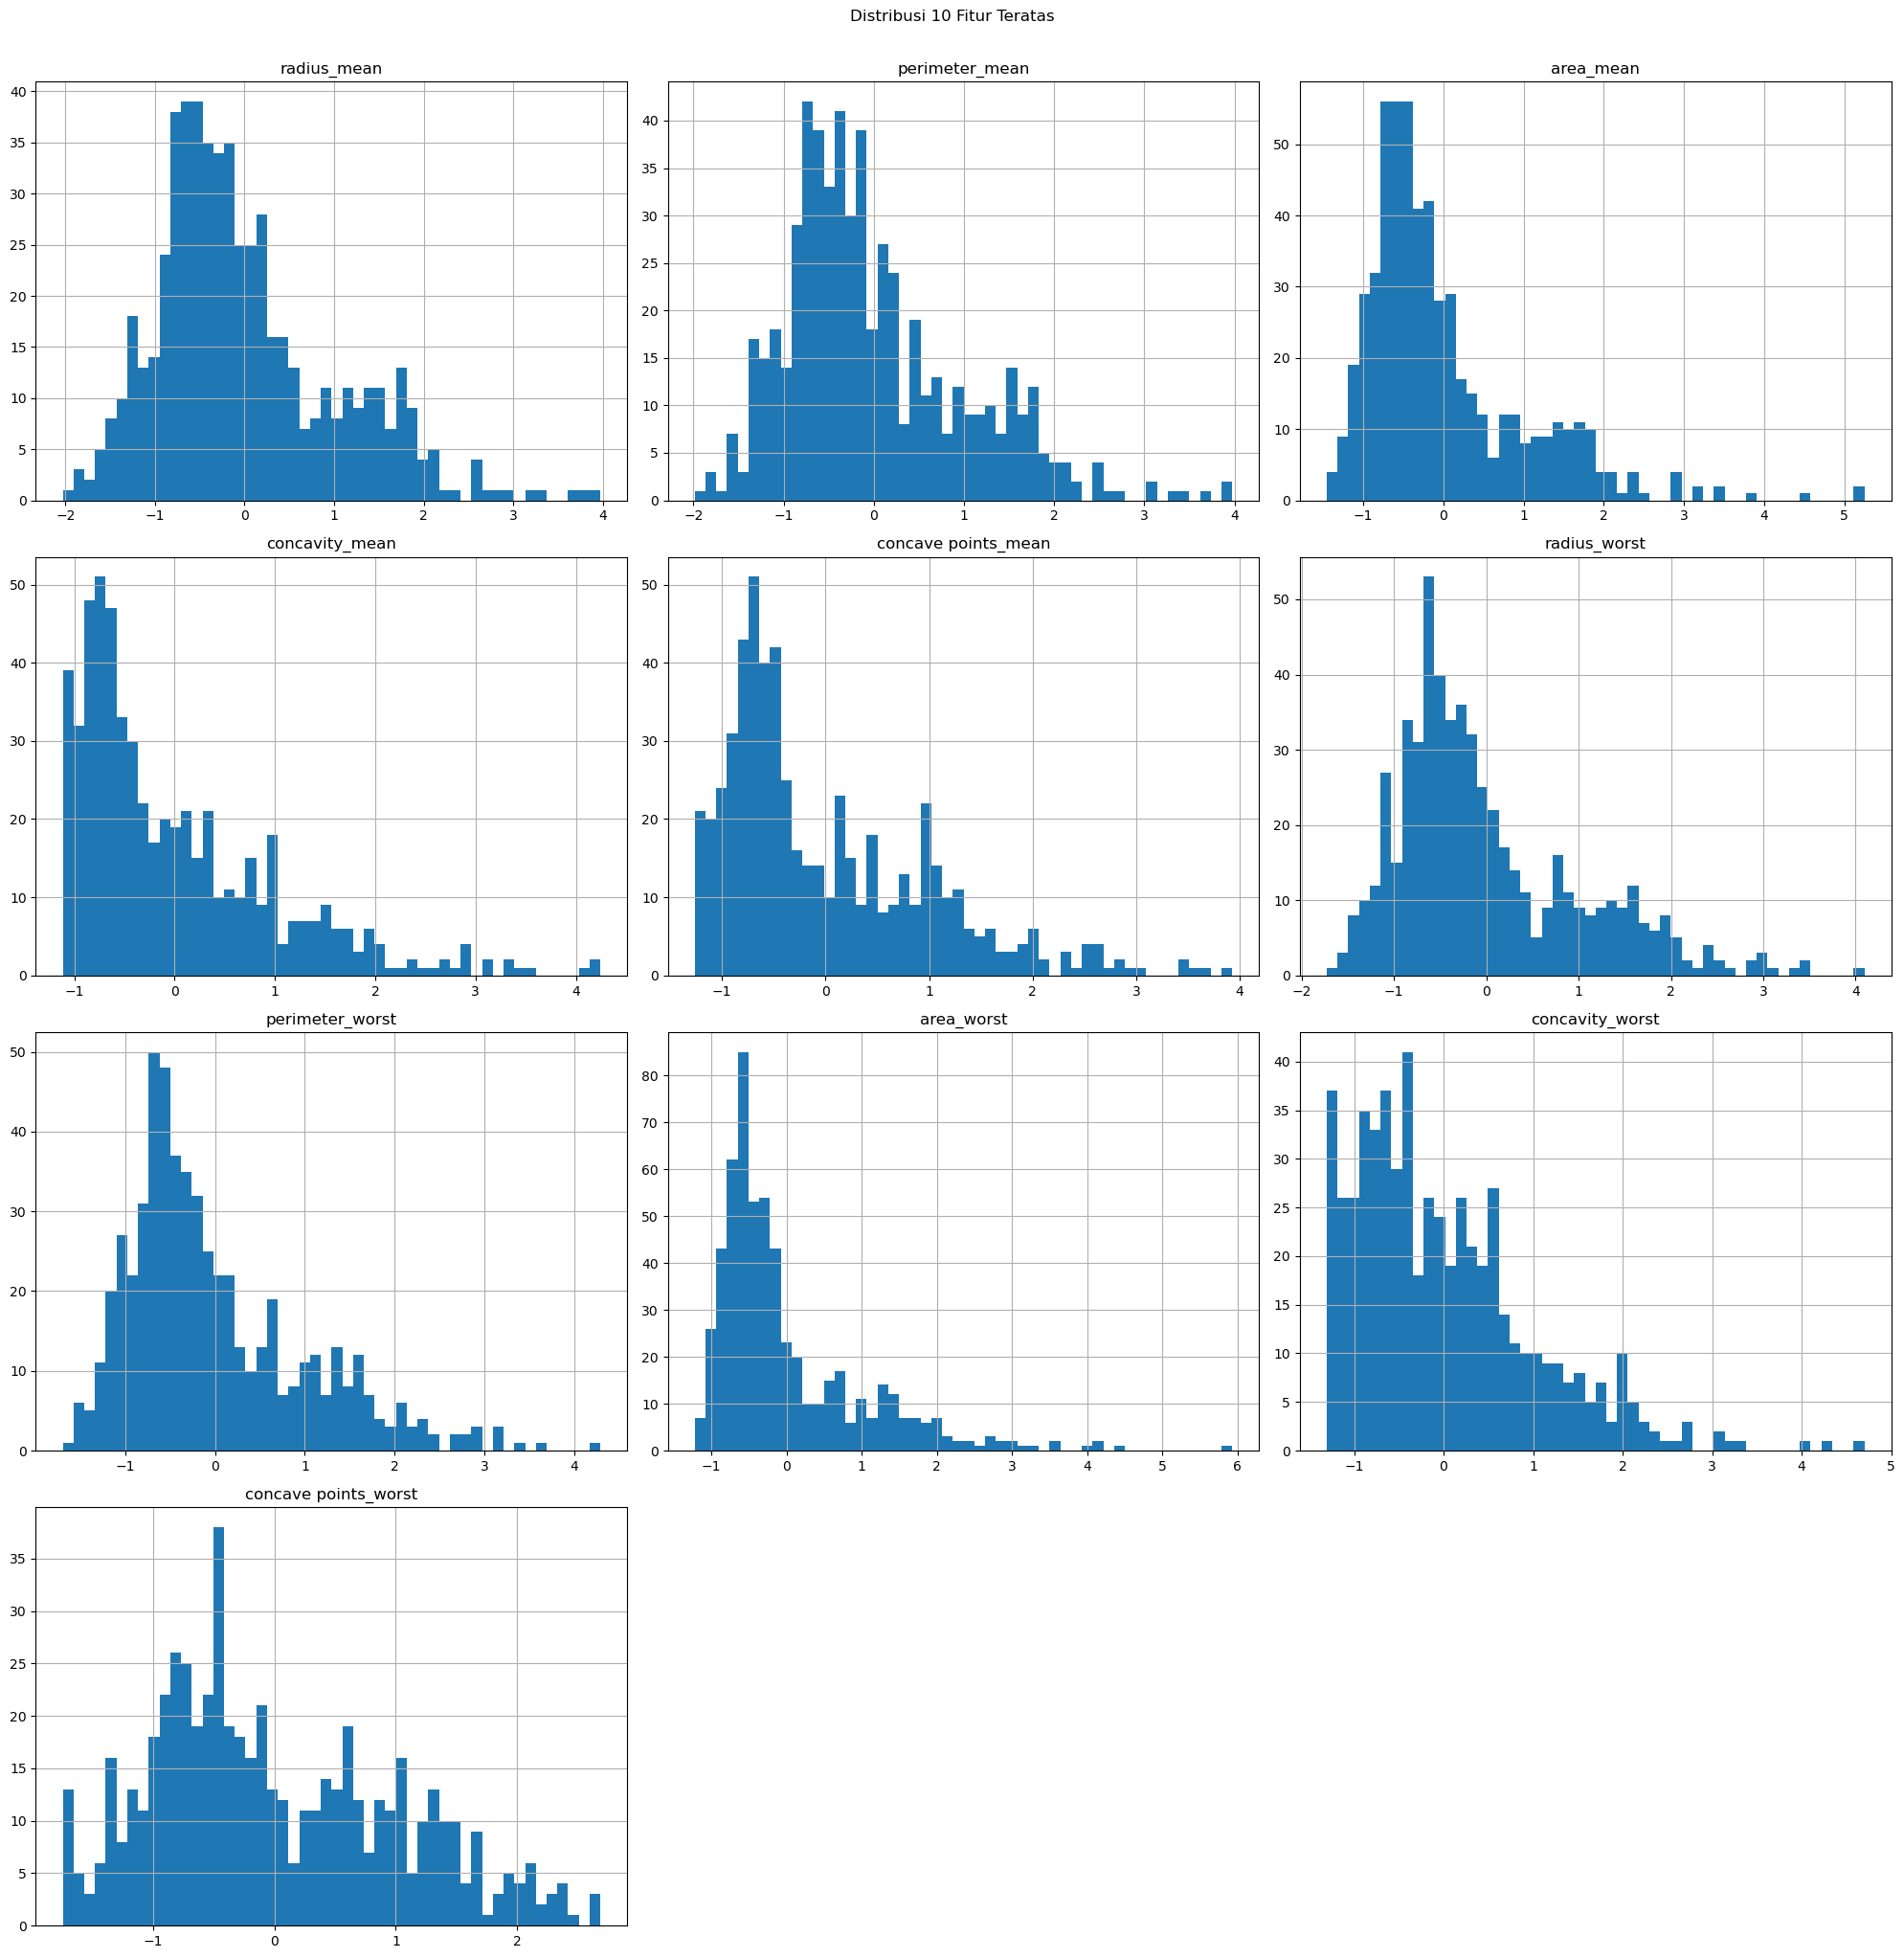


Hasil uji t-test untuk fitur-fitur penting:
radius_mean: t-statistic = -25.4358, p-value = 8.4659e-96
perimeter_mean: t-statistic = -26.4052, p-value = 8.4363e-101
area_mean: t-statistic = -23.9387, p-value = 4.7346e-88
concavity_mean: t-statistic = -23.1040, p-value = 9.9666e-84
concave points_mean: t-statistic = -29.3543, p-value = 7.1012e-116
radius_worst: t-statistic = -29.3391, p-value = 8.4823e-116
perimeter_worst: t-statistic = -29.9657, p-value = 5.7714e-119
area_worst: t-statistic = -25.7216, p-value = 2.8288e-97
concavity_worst: t-statistic = -20.8972, p-value = 2.4647e-72
concave points_worst: t-statistic = -31.0546, p-value = 1.9691e-124


In [51]:
# Main execution
file_path = r"C:\Users\HP\Documents\data mining\breast-cancer.csv"
data = load_and_preprocess_data(file_path)
data_scaled = normalize_data(data)
top_features = select_important_features(data_scaled)

visualize_data(data_scaled, top_features)
perform_statistical_tests(data_scaled, top_features)

Hasil uji test membuktikan : 
1. Signifikan statistik :
semua fitur yang diuji menunjukkan p-value yang sangat kecil (p < 0.05), bahkan jauh lebih kecil. ini membuktikan bahwa perbedaan nilai - nilai fitur antara tumor jinak dan ganas sangat signifikan secara statistik
2. Perbedaan karakteristik :
nilai t-statistic yang negatif untuk semua fitur menunjukkan bahwa rata-rata nilai fitur untuk tumor ganas lebih tinggi daripada tumor jinak. ini membuktikan bahwa tumor ganas cenderung memiliki karakteristik yang lebih ekstrem. misalnya, radius yang lebih besar, area yang lebih luas, tingkat concavity yang lebih tinggi dibandingkan tumor jinak
3. Kekuatan perbedaan :
nilai absolut t-statistic yang tinggi (semua di atas 20), menunjukkan perbedaan yang sangat kuat antara dua kelompok. fitur seperti 'concave points_worst'  (t= -31....) dan 'perimeter_worst' (t = -29......) menunjukkan perbedaan yang paling kuat
4. Relevansi fitur :
hasil membuktikan bahwa fitur - fitur yang dipilih sangat relevan dalam membedakan antara tumor jinak dan tumor ganas. fitur - fitur ini bisa menjadi indikator yang kuat dalam diagnosis kanker payudara
5. Konsistensi pola :
fitur 'mean' maupun fitur 'worst' menunjukkan perbedaan yang signifikan, membuktikan konsisitensi pola dalam karakteristiktumor
6. Potensi diagnostik :
hasil ini membuktikan bahwa analisis karakteristik sel seperti radius, perimeter, area, concavity dan concave point bisa menjadi alat diagnostik yang potensial dalam membedakan tumor jinak dan tumor ganas
7. Basis untuk klasifikasi :
perbedaan yang signifikan ini memberikan dasar yang kuat untuk pengembangan model klasifikasi yang akurat untuk mendiagnosis kanker payudara berdasarkan karakteristik sel

Kesimpulan : 
hasil uji t-test ini membuktikan bahwa terdapat perbedaan yang signifikan dan konsisten dalam karakteristik sel antara tumor payudara jinak dan ganas. Ini mendukung penggunaan fitur-fitur ini dalam diagnosis dan penelitian kanker payudara, serta memberikan landasan ilmiah untuk pengembangan alat diagnostik berbasis analisis gambar atau data sel.